In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [14]:
data = pd.read_csv("car data.csv")

In [6]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [33]:
X_train, X_test, y_train, y_test = train_test_split(
 data.drop("Selling_Price", axis=1),
 data["Selling_Price"],
 test_size=0.3,
 random_state=0)

In [22]:
y_train.groupby(data["Car_Name"]).mean().sort_values()

Car_Name
Bajaj Pulsar 150       0.10000
Honda CB Shine         0.12000
Bajaj Discover 125     0.17500
Bajaj  ct 100          0.18000
Hero  Ignitor Disc     0.20000
                        ...   
creta                 11.25000
elantra               11.60000
innova                12.29000
fortuner              16.13125
land cruiser          35.00000
Name: Selling_Price, Length: 85, dtype: float64

In [23]:
ordered_labels = y_train.groupby(data["Car_Name"]).mean().sort_values().index

In [24]:
ordered_labels 

Index(['Bajaj Pulsar 150', 'Honda CB Shine', 'Bajaj Discover 125',
       'Bajaj  ct 100', 'Hero  Ignitor Disc', 'Hero Super Splendor',
       'Hero Hunk', 'Hero  CBZ Xtreme', 'Honda CB twister', 'Hero Glamour',
       'Suzuki Access 125', 'TVS Wego', 'Bajaj Discover 100',
       'Hero Honda Passion Pro', 'Hero Splender Plus', 'Activa 3g',
       'TVS Jupyter', 'Honda Activa 125', 'Honda CB Unicorn',
       'Hero Splender iSmart', 'Bajaj Pulsar 135 LS', 'Yamaha FZ S ',
       'Hero Passion Pro', 'Honda CB Trigger', 'Bajaj Avenger Street 220',
       'TVS Apache RTR 180', 'Honda Activa 4G', 'Bajaj Pulsar NS 200',
       'TVS Sport ', 'Yamaha Fazer ', 'Hero Passion X pro',
       'Bajaj Pulsar 220 F', 'Yamaha FZ S V 2.0', 'Bajaj Avenger 220 dtsi',
       'TVS Apache RTR 160', 'Honda CBR 150', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Honda CB Hornet 160R', 'Bajaj Avenger 150',
       'Yamaha FZ 16', 'Bajaj Avenger 220', 'Royal Enfield Classic 500',
       'Bajaj Pulsar RS20

In [25]:
ordinal_mapping = {
 k: i for i, k in enumerate(
 ordered_labels, 0)
}


In [26]:
ordinal_mapping

{'Bajaj Pulsar 150': 0,
 'Honda CB Shine': 1,
 'Bajaj Discover 125': 2,
 'Bajaj  ct 100': 3,
 'Hero  Ignitor Disc': 4,
 'Hero Super Splendor': 5,
 'Hero Hunk': 6,
 'Hero  CBZ Xtreme': 7,
 'Honda CB twister': 8,
 'Hero Glamour': 9,
 'Suzuki Access 125': 10,
 'TVS Wego': 11,
 'Bajaj Discover 100': 12,
 'Hero Honda Passion Pro': 13,
 'Hero Splender Plus': 14,
 'Activa 3g': 15,
 'TVS Jupyter': 16,
 'Honda Activa 125': 17,
 'Honda CB Unicorn': 18,
 'Hero Splender iSmart': 19,
 'Bajaj Pulsar 135 LS': 20,
 'Yamaha FZ S ': 21,
 'Hero Passion Pro': 22,
 'Honda CB Trigger': 23,
 'Bajaj Avenger Street 220': 24,
 'TVS Apache RTR 180': 25,
 'Honda Activa 4G': 26,
 'Bajaj Pulsar NS 200': 27,
 'TVS Sport ': 28,
 'Yamaha Fazer ': 29,
 'Hero Passion X pro': 30,
 'Bajaj Pulsar 220 F': 31,
 'Yamaha FZ S V 2.0': 32,
 'Bajaj Avenger 220 dtsi': 33,
 'TVS Apache RTR 160': 34,
 'Honda CBR 150': 35,
 'Bajaj Avenger 150 street': 36,
 'Yamaha FZ  v 2.0': 37,
 'Honda CB Hornet 160R': 38,
 'Bajaj Avenger 150': 39,

In [27]:
X_train["Car_Name"] = X_train["Car_Name"].map(ordinal_mapping)
X_test["Car_Name"] = X_test["Car_Name"].map(ordinal_mapping)

In [28]:
X_train["Car_Name"]

222    72
283    79
44     48
245    75
191     2
       ..
251    79
192     6
117    49
47     56
172    20
Name: Car_Name, Length: 210, dtype: int64

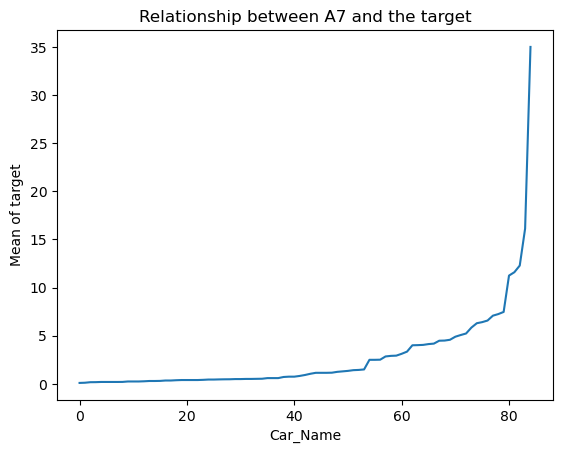

In [29]:
y_train.groupby(X_train["Car_Name"]).mean().plot()
plt.title("Relationship between A7 and the target")
plt.ylabel("Mean of target")
plt.show()

### ordered ordinal encoding using Feature-engine

In [31]:
from feature_engine.encoding import OrdinalEncoder
ordinal_enc = OrdinalEncoder(encoding_method="ordered", variables=None)

In [34]:
ordinal_enc.fit(X_train, y_train)

OrdinalEncoder()

In [35]:
X_train_enc = ordinal_enc.transform(X_train)
X_test_enc = ordinal_enc.transform(X_test)

c:\Users\Sajid\anaconda3\lib\site-packages\feature_engine\encoding\base_encoder.py:210: UserWarning: During the encoding, NaN values were introduced in the feature(s) Car_Name.
  warnings.warn(


In [36]:
X_train_enc 

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
222,72,2014,7.60,77632,2,1,0,0
283,79,2016,11.80,9010,1,1,0,0
44,48,2012,2.69,50000,1,1,0,0
245,75,2012,9.40,71000,2,1,0,0
191,2,2012,0.57,25000,1,0,0,1
...,...,...,...,...,...,...,...,...
251,79,2013,9.90,56701,1,1,0,0
192,6,2007,0.75,49000,1,0,0,1
117,49,2015,1.90,14000,1,0,0,0
47,56,2006,4.15,65000,1,1,0,0


In [38]:
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


### Encoding with the Weight of Evidence
The Weight of Evidence (WoE) was developed primarily for credit and financial industries to facilitate 
variable screening and exploratory analysis and to build more predictive linear models to evaluate 
the risk of loan defaults.

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
 data.drop("Selling_Price", axis=1),
 data["Selling_Price"],
 test_size=0.3,
 random_state=0)

In [40]:
X_train

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
222,i20,2014,7.60,77632,Diesel,Dealer,Manual,0
283,city,2016,11.80,9010,Petrol,Dealer,Manual,0
44,omni,2012,2.69,50000,Petrol,Dealer,Manual,0
245,verna,2012,9.40,71000,Diesel,Dealer,Manual,0
191,Bajaj Discover 125,2012,0.57,25000,Petrol,Individual,Manual,1
...,...,...,...,...,...,...,...,...
251,city,2013,9.90,56701,Petrol,Dealer,Manual,0
192,Hero Hunk,2007,0.75,49000,Petrol,Individual,Manual,1
117,Royal Enfield Thunder 500,2015,1.90,14000,Petrol,Individual,Manual,0
47,wagon r,2006,4.15,65000,Petrol,Dealer,Manual,0
